<a href="https://colab.research.google.com/github/lotaa/VGG-Paper/blob/master/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Example OF creating a CNN model vgg blocks

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 256, 256, 256)     7168      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 256, 256, 256)     590080    
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 256, 256, 256)     590080    
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 256, 256, 256)     590080    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 128, 128, 256)     0         
Total params: 1,777,408
Trainable params: 1,777,408
Non-trainable params: 0
_________________________________________________

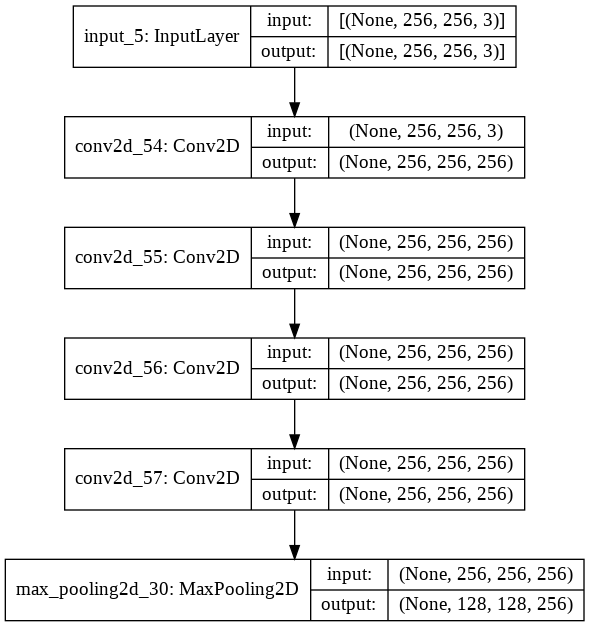

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils.vis_utils import plot_model 

# function for creating a vgg block
def vgg_block(layer_in, n_filter, n_conv):
  # add convolutional layer
  for _ in range(n_conv):
    layer_in = Conv2D(n_filter, (3,3), padding ='same' ,activation ='relu')(layer_in)
  # add Maxpooling layer
  layer_in = MaxPooling2D((2,2), strides= (2,2))(layer_in)
  return layer_in

#define a model input 
visible = Input(shape=(256,256,3))

#add vgg model
layer = vgg_block(visible,64,2)

#add vgg model
layer = vgg_block(visible,128,2)

#add vgg model
layer = vgg_block(visible,256,4)

model = Model(inputs= visible, outputs=layer)

#summarize model
model.summary()

#plot model architecture
plot_model (model, show_shapes= True, to_file ='multiple_vgg_blocks.png')

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.utils.vis_utils import plot_model 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(32,32,3), activation="relu", padding="same"))
model.add(MaxPool2D((2,2), (2,2)))
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(MaxPool2D((2,2), (2,2)))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(MaxPool2D((2,2), (2,2)))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(MaxPool2D((2,2), (2,2)))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(MaxPool2D((2,2), (2,2)))
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dense(10, activation="softmax"))
#summarize model
model.summary()

#plot model architecture
#plot_model (model, show_shapes= True, to_file ='multiple_vgg_blocks.png')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         5

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics = ['accuracy'])

In [ ]:
#keras library for CIFAR10 dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Train-Validation-test spilt 
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val =train_test_split(x_train, y_train, test_size=0.3)

#Dimension of the CIFAR10 datasets
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#Ohot Encoding the labels
from sklearn.utils.multiclass import unique_labels
from keras.utils.np_utils import to_categorical

#since we have 10 classes we should expect the shape[1] of y_train, y_val ,y_test
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
y_train = to_categorical(y_train)

#verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
# Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range = 2, horizontal_flip =True, zoom_range =0.1)
val_generator = ImageDataGenerator(rotation_range = 2, horizontal_flip =True, zoom_range =0.1)
test_generator = ImageDataGenerator(rotation_range = 2, horizontal_flip =True, zoom_range =0.1)

#Fitting the agumentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
#learning Rate AnneaLer
from keras.callbacks import ReduceLROnPlateau
lrr = ReduceLROnPlateau(monitor ='val_acc', factor =0.01 , patience =3 ,min_lr =1e-5 )

In [ ]:
#Define parameters
batch_size =100
epochs =5
learn_rate =0.01

In [ ]:
model.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, steps_per_epoch= x_train.shape[0]//batch_size, validation_data=val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps=250, callbacks=[lrr],verbose=1 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
350/350 [==============================] - 2065s 6s/step - loss: 2.2167 - accuracy: 0.2466 - val_loss: 1.6152 - val_accuracy: 0.3943 - lr: 0.0010
Epoch 2/5
341/350 [============================>.] - ETA: 48s - loss: 1.5487 - accuracy: 0.4170